# MAT 258A: Homework 3

# Exercise 1
In this exercise, I test the code of 'pure' Newton (newtmin), Newton method with Armijo backtracking (newtmin1), Newton method with Armijo backtracking and two different way of treatment of the Hessian (newtmin2 and newtmin3) and BFGS method with treatment of the initial Hessian (mybfgs)

$
    \begin{array}{cccccc}
    &\textrm{pure Newton}&\textrm{newtmin1}&\textrm{newtmin2}&\textrm{newtmin3}&\textrm{GFGS}\\
    1&\surd &&&&\\
    2&\times &\times&\times&\times&\surd\\
    3&\surd &&&&\\
    4&\surd &&&&\\
    5&\surd &&&&\\
    6&\surd &&&&\\
    7&\times &\times&\times&\times&\surd\\
    8&\surd &&&&\\
    9&\surd &&&&\\
    10&\times &\times&\surd&&\\
    11&\times &\times&\times&\surd&\\
    12&\times &\times&\surd&&\\
    13&\surd &&&&\\
    14&\times &\times&\times&\times&\times\\
    15&\times &\times&\times&\times&\surd\\
    16&\surd &&&&\\
    17&\surd &&&&\\
    18&\times &\times&\times&\times&\times\\
    \end{array}
$

The above table shows the outcome of those methods, it is 'success' if the gradient's norm is relatively small, i.e., $\frac{\|g(x^*)\|}{\|g(x_0)\|}\leqslant10^{-5}$, this is a relatively high requirement and actually one can see that those 'failed' cases in BFGS and newtmin2 and newtmin3 also have a relatively small norm of the gradient. Below is technical details of the exercise.

In [1]:
using Toms566
using PyPlot

In [2]:
Pkg.test("Toms566")

INFO: Testing Toms566


No.  Name                             n        f(x0)     |∇f(x0)| cond(∇²f(x0))
  

INFO: Toms566 tests passed


1  Hellical valley                  3     2.50e+03     1.88e+03     9.82e+00
  2  Bigg's EXP6                      6     7.79e-01     2.55e+00     1.30e+01
  3  Gaussian                         3     3.89e-06     7.45e-03     5.10e+01
  4  Powell                           2     1.14e+00     2.00e+04     1.37e+08
  5  Box 3-dim                        3     1.03e+03     1.49e+02     1.19e+02
  6  Variably dimensioned            40     9.39e+10     1.01e+11     1.65e+04
  7  Watson                           9     3.00e+01     1.78e+02     1.63e+02
  8  Penalty I                       60     5.45e+09     8.02e+07     4.24e+00
  9  Penalty II                      65     2.87e+05     3.28e+05     9.84e+01
 10  Brown badly scaled               2     1.00e+12     2.00e+06     1.00e+00
 11  Brown and Denis                  4     7.93e+06     2.14e+06     6.93e+02
 12  Gulf research and development    3     1.21e+01     3.97e+01     4.65e+04
 13  Trigonometric                   40     2.01e-03  

In [3]:
function newtmin( obj, x0; maxIts=100, optTol=1e-6)
     #"Pure" Newton method
     # Minimize a function f using Newton’s method.
     # obj:  a function that evaluates the objective value,
     # gradient, and Hessian at a point x, i.e.,
     # (f, g, H) = obj(x)
     # x0: starting point.
     # maxIts (optional): maximum number of iterations.
     # optTol (optional): optimality tolerance based on
     #                    ||grad(x)|| <= optTol*||grad(x0)||
    x=x0
    status = 0
    its = 0
    (f0,g0,H0)=obj(x0)
    (f,g,H)=obj(x)
    while status != 1
        x = x-inv(H)*g
        (f,g,H)=obj(x)
        its = its+1
        if norm(g)<= optTol*norm(g0)
            status = 1
        end
        if its>maxIts
            status = 1
        end
    end
return (x, its)
end

newtmin (generic function with 1 method)

In [4]:
v=randn(10,1)
A=randn(10,10)
inv(A)
eye(10)

10x10 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [5]:
function obj(x)
    f=1/2*norm(x-v)^2
    g=x-v
    H=eye(10)
    return (f,g,H)
end

obj (generic function with 1 method)

In [6]:
x0=zeros(10,1)
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(x-v)

0.0

In [7]:
p = Problem(1) # Hellical Valley

Toms566.Problem:
 name: Hellical valley
 n: 3

In [10]:
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end

obj (generic function with 1 method)

In [9]:
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

1.0002073324421774e-8

In [10]:
p = Problem(2)
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

11735.764558124118

In [6]:
p = Problem(3) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

1.3020078124065462e-8

In [12]:
p = Problem(4) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

1.0155390280377853e-9

In [13]:
p = Problem(5) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

8.68652479136446e-7

In [14]:
p = Problem(6) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

6.720802512276261e-7

In [15]:
p = Problem(7) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

9.060968995677416e18

In [16]:
p = Problem(8) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

9.223518288696248e-7

In [17]:
p = Problem(9) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

7.262191147715546e-7

In [18]:
p = Problem(10) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

7.083640796727696e6

In [19]:
p = Problem(11) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

1.9734314374508443e8

In [20]:
p = Problem(12) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

2.6556527256401906e239

In [21]:
p = Problem(13) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

5.50382562199281e-8

In [22]:
p = Problem(14) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

8.050634401598488e9

In [23]:
p = Problem(15) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

3.242292834706322e23

In [24]:
p = Problem(16) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.0

In [25]:
p = Problem(17) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

9.282369975556412e-7

In [ ]:
p = Problem(18) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

In [4]:
function newtmin1( obj, x0; maxIts=100, optTol=1e-6)
     # Newton method with Armijo backtracking
     # Minimize a function f using Newton’s method.
     # obj:  a function that evaluates the objective value,
     # gradient, and Hessian at a point x, i.e.,
     # (f, g, H) = obj(x)
     # x0: starting point.
     # maxIts (optional): maximum number of iterations.
     # optTol (optional): optimality tolerance based on
     #                    ||grad(x)|| <= optTol*||grad(x0)||
    mu=1e-4
    x=x0
    status = 0
    its = 0
    (f0,g0,H0)=obj(x0)
    (f,g,H)=obj(x)
    while status != 1
        alpha = 1
        xnew = x-alpha*inv(H)*g
        (fnew,gnew,Hnew)=obj(xnew)
        sts =-fnew+f-alpha*mu*g'*inv(H)*g
        while sts[1]<0
            alpha=alpha/2
            xnew = x-alpha*inv(H)*g
            (fnew,gnew,Hnew)=obj(xnew)
            sts=-fnew+f-alpha*mu*g'*inv(H)*g
        end
        x = x-alpha*inv(H)*g
        (f,g,H)=obj(x)
        its = its+1
        if norm(g)<= optTol*norm(g0)
            status = 1
        end
        if its>maxIts
            status = 1
        end
    end
return (x, its)
end

newtmin1 (generic function with 1 method)

In [8]:
p = Problem(2) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin1( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

1.0000000000000004

In [13]:
p = Problem(7) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin1( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.863325933874392

In [14]:
p = Problem(10) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin1( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

250000.25000099998

In [15]:
p = Problem(11) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin1( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.005490328480657573

In [16]:
p = Problem(12) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin1( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.16957718015199827

In [19]:
p = Problem(14) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin1( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.5779385738800985

In [20]:
p = Problem(15) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin1( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.45464058777161137

In [21]:
p = Problem(18) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin1( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.933985346920556

In [5]:
function newtmin2( obj, x0; maxIts=100, optTol=1e-6)
    # Newton method with Armijo backtracking and some treatment with Hessian, treatment 1
     # Minimize a function f using Newton’s method.
     # obj:  a function that evaluates the objective value,
     # gradient, and Hessian at a point x, i.e.,
     # (f, g, H) = obj(x)
     # x0: starting point.
     # maxIts (optional): maximum number of iterations.
     # optTol (optional): optimality tolerance based on
     #                    ||grad(x)|| <= optTol*||grad(x0)||
    mu=1e-4
    epsilon=0.01
    x=x0
    status = 0
    its = 0
    (f0,g0,H0)=obj(x0)
    (f,g,H)=obj(x)
    (V,S)=eig(H)
    bar=ones(size(H,1))*epsilon
    bar=Diagonal(bar)
    bH=S*max(bar,Diagonal(V))*S'
    while status != 1
        alpha = 1
        xnew = x-alpha*inv(bH)*g
        (fnew,gnew,Hnew)=obj(xnew)
        sts =-fnew+f-alpha*mu*g'*inv(bH)*g
        while sts[1]<0
            alpha=alpha/2
            xnew = x-alpha*inv(bH)*g
            (fnew,gnew,Hnew)=obj(xnew)
            sts=-fnew+f-alpha*mu*g'*inv(bH)*g
        end
        x = x-alpha*inv(bH)*g
        (f,g,H)=obj(x)
        (V,S)=eig(H)
        bar=ones(size(H,1))*epsilon
        bar=Diagonal(bar)
        bH=S*max(bar,Diagonal(V))*S'
        its = its+1
        if norm(g)<= optTol*norm(g0)
            status = 1
        end
        if its>maxIts
            status = 1
        end
    end
return (x, its)
end

newtmin2 (generic function with 1 method)

In [72]:
p = Problem(2) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin2( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.15069684447784829

In [73]:
p = Problem(7) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin2( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.0698683411045317

In [74]:
p = Problem(10) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin2( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

8.404388296420837e-13

In [77]:
p = Problem(11) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin2( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.22947981066293166

In [80]:
p = Problem(12) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin2( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

1.5231878310266746e-5

In [83]:
p = Problem(14) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin2( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.9826622874404953

In [86]:
p = Problem(15) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin2( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.834929873113459

In [89]:
p = Problem(18) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin2( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.32465019085415453

In [6]:
function newtmin3( obj, x0; maxIts=100, optTol=1e-6)
    # Newton method with Armijo backtracking and some treatment with Hessian, treatment 2
     # Minimize a function f using Newton’s method.
     # obj:  a function that evaluates the objective value,
     # gradient, and Hessian at a point x, i.e.,
     # (f, g, H) = obj(x)
     # x0: starting point.
     # maxIts (optional): maximum number of iterations.
     # optTol (optional): optimality tolerance based on
     #                    ||grad(x)|| <= optTol*||grad(x0)||
    mu=1e-4
    epsilon=0.01
    x=x0
    status = 0
    its = 0
    (f0,g0,H0)=obj(x0)
    (f,g,H)=obj(x)
    (V,S)=eig(H)
    bar=ones(size(H,1))*epsilon
    bar=Diagonal(bar)
    bH=S*max(bar,abs(Diagonal(V)))*S'
    while status != 1
        alpha = 1
        xnew = x-alpha*inv(bH)*g
        (fnew,gnew,Hnew)=obj(xnew)
        sts =-fnew+f-alpha*mu*g'*inv(bH)*g
        while sts[1]<0
            alpha=alpha/2
            xnew = x-alpha*inv(bH)*g
            (fnew,gnew,Hnew)=obj(xnew)
            sts=-fnew+f-alpha*mu*g'*inv(bH)*g
        end
        x = x-alpha*inv(bH)*g
        (f,g,H)=obj(x)
        (V,S)=eig(H)
        bar=ones(size(H,1))*epsilon
        bar=Diagonal(bar)
        bH=S*max(bar,abs(Diagonal(V)))*S'
        its = its+1
        if norm(g)<= optTol*norm(g0)
            status = 1
        end
        if its>maxIts
            status = 1
        end
    end
return (x, its)
end

newtmin3 (generic function with 1 method)

In [104]:
p = Problem(2) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin3( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.04974099571706037

In [96]:
p = Problem(7) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin3( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.003400009283027661

In [97]:
p = Problem(10) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin3( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

1.789679515697544e-13

In [98]:
p = Problem(11) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin3( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

3.3822921362972896e-7

In [99]:
p = Problem(14) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin3( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.011037420345164398

In [100]:
p = Problem(15) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin3( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.001195675544522462

In [101]:
p = Problem(18) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=newtmin3( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.0407760590874033

In [7]:
function mybfgs( obj, x0; maxIts=100, optTol=1e-6)
    # BFGS method with Armijo backtracking and some treatment with initial Hessian, treatment 2
     # Minimize a function f using Newton’s method.
     # obj:  a function that evaluates the objective value,
     # gradient, and Hessian at a point x, i.e.,
     # (f, g, H) = obj(x)
     # x0: starting point.
     # maxIts (optional): maximum number of iterations.
     # optTol (optional): optimality tolerance based on
     #                    ||grad(x)|| <= optTol*||grad(x0)||
    mu=1e-4
    epsilon=0.01
    x=x0
    status = 0
    its = 0
    (f0,g0,H0)=obj(x0)
    (f,g,H)=obj(x)
    (V,S)=eig(H)
    bar=ones(size(H,1))*epsilon
    bar=Diagonal(bar)
    bH=S*max(bar,abs(Diagonal(V)))*S'
     Hk=bH
    while status != 1
        mp=-Hk*g
        #////////////////////////////////////////////////////
        #line search
        alpha = 1
        xnew = x+alpha*mp
        (fnew,gnew,Hnew)=obj(xnew)
        sts =-fnew+f+alpha*mu*g'*mp
        while sts[1]<0
            alpha=alpha/2
            xnew = x+alpha*mp
            (fnew,gnew,Hnew)=obj(xnew)
            sts=-fnew+f+alpha*mu*g'*mp
        end
        #////////////////////////////////////////////////////
        sk=alpha*mp
        yk=gnew-g
        tt1=yk'*sk
        tt1=tt1[1]
        rho=1/tt1
        Hk=(eye(size(Hk,1))-rho*sk*yk')*Hk*(eye(size(Hk,1))-rho*yk*sk')+rho*sk*sk'
        x = x+alpha*mp
        (f,g,H)=obj(x)
        its = its+1
        if norm(g)<= optTol*norm(g0)
            status = 1
        end
        if its>maxIts
            status = 1
        end
    end
return (x, its)
end

mybfgs (generic function with 1 method)

In [8]:
p = Problem(18) 
function obj(x)
    f = p.obj(x)   # objective value at x
    g = p.grd(x)   # gradient at x
    H = p.hes(x)   # Hessian at x
    return (f,g,H)
end
x0=p.x0 
(x,it)=mybfgs( obj, x0; maxIts=100, optTol=1e-6)
norm(p.grd(x))/norm(p.grd(x0))

0.004652492176771119

# Exercise 2

Below is the staff about Exercise 2, one can see that inorder to get the same level of accuracy, the steepest descent method I used in homework 2 requires 262 steps, but mybfgs only need 8 steps. It is much faster than the method in homework 2.

In [9]:
data = readcsv("binary.csv");
admit=data[2:401,1];
gre=data[2:401,2];
gpa=data[2:401,3];
admit=convert(Array{Float64,1}, admit);
gre=convert(Array{Float64,1}, gre)/800;
gpa=convert(Array{Float64,1}, gpa);
A=[gre gpa];
u=A;
y=admit;

In [10]:
function logf(x,y,u)
    alpha=x[1:length(x)-1]
    beta=x[length(x)]
    zz=ones(size(y))
    -(u*alpha+beta)'*y+(log(1+exp(u*alpha+beta)))'*zz
    #xx=0
    #for i =1:length(y)
     #   xx=xx+y[i]*(alpha'*u[i,:]'+beta)-log(1+exp(alpha'*u[i,:]'+beta))
    #end
    #return -xx
end

logf (generic function with 1 method)

In [11]:
function logg(x,y,u) 
    alpha=x[1:length(x)-1]
    beta=x[length(x)]
    zz=ones(size(y))
    upp=u'*y-u'*(exp(u*alpha+beta)./(1+exp(u*alpha+beta)))
    lpp=zz'*y-zz'*(exp(u*alpha+beta)./(1+exp(u*alpha+beta)))
        #upp1=0
        #upp2=0
        #lpp=0
    #for i =1:length(y)
     #   upp1=upp1+y[i]*u[i,1]-exp(alpha[1]*u[i,1]+alpha[2]*u[i,2]+beta)/(1+exp(alpha[1]*u[i,1]+alpha[2]*u[i,2]+beta))*u[i,1]
     #   upp2=upp2+y[i]*u[i,2]-exp(alpha[1]*u[i,1]+alpha[2]*u[i,2]+beta)/(1+exp(alpha[1]*u[i,1]+alpha[2]*u[i,2]+beta))*u[i,2]
     #   lpp=lpp+y[i]-exp(alpha'*u[i,:]'+beta)/(1+exp(alpha'*u[i,:]'+beta))
    #end
    return [-upp; -lpp]
end

logg (generic function with 1 method)

In [20]:
function logH(x,y,u)
    alpha=x[1:length(x)-1]
    beta=x[length(x)]
    zz=ones(size(y))
    myexp=exp(u*alpha+beta)
    lr=-zz'*(exp(u*alpha+beta)./(1+exp(u*alpha+beta)).^2)
    ur=-u'*(exp(u*alpha+beta)./(1+exp(u*alpha+beta)).^2)
    ll=ur'
    ul=zeros(2,2)
    for i=1:length(y)
        ul=ul-u[i,:]'*u[i,:]*myexp[i]/(1+myexp[i])^2
    end
    return [-ul ur;ll lr]
end

logH (generic function with 1 method)

In [21]:
function obj(x)
    f = logf(x,y,u)   # objective value at x
    g = logg(x,y,u)   # gradient at x
    H = logH(x,y,u)   # Hessian at x
    return (f,g,H)
end
x0=[0.0,0.0,0.0] 
(x,it)=mybfgs( obj, x0; maxIts=100, optTol=1e-6)


([2.152545051902534,0.7546868120233584,-4.9493772373034925],8)

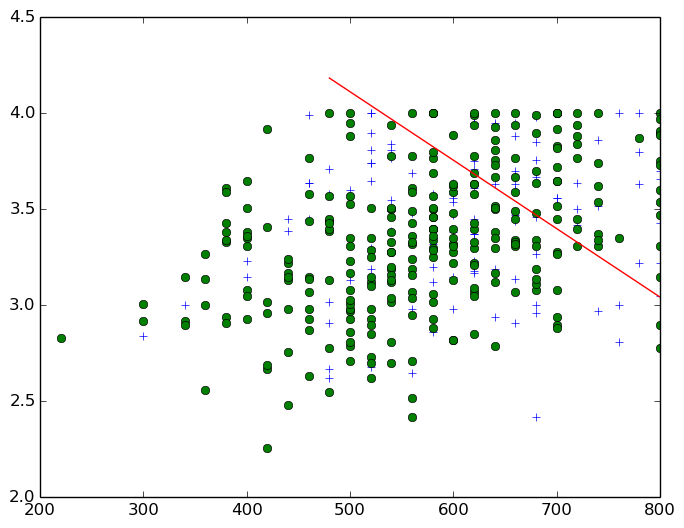

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7efe56953390>

In [24]:
alpha=x[1:2];
beta=x[3];
plot(gre[admit.==1]*800,gpa[admit.==1],"+")
plot(gre[admit.==0]*800,gpa[admit.==0],"o")
rrr=0.6*800:1/100:800
ry=-alpha[1]/alpha[2]*rrr/800+(-1/2-beta)/alpha[2]
plot(rrr,ry)